In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [116]:
df = pd.read_excel('qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxell.xlsx')

In [117]:
df

,Month,Air,Land,Sea,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03,495011,0,93061,588072
79,2019-01,163026,0,33568,196594
80,2018-08,1153300,0,55718,1209018
81,2018-02,316957,0,30667,347624


In [118]:
df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


Data Quality Check (Missing Values, Duplicates)

In [119]:

missing_values = df.isnull().sum()


duplicate_rows = df.duplicated().sum()


df_info = df.info()

missing_values, duplicate_rows, df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   83 non-null     object
 1   Air Arrivals            83 non-null     int64 
 2   Land Arrivals           83 non-null     int64 
 3   Sea Arrivals            83 non-null     int64 
 4   Total Visitor Arrivals  83 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ KB


(Month                     0
 Air Arrivals              0
 Land Arrivals             0
 Sea Arrivals              0
 Total Visitor Arrivals    0
 dtype: int64,
 0,
 None)

Summary Statistics and Descriptive Analysis

In [120]:

descriptive_stats = df.describe()


df_head = df.head()

# Display the summary statistics and data preview
descriptive_stats, df_head


(       Air Arrivals  Land Arrivals   Sea Arrivals  Total Visitor Arrivals
 count  8.300000e+01      83.000000      83.000000            8.300000e+01
 mean   4.271044e+05   49459.710843   50702.819277            5.272669e+05
 std    4.690361e+05   69345.026108   52220.821748            4.840109e+05
 min    1.164500e+04       0.000000       0.000000            1.331200e+04
 25%    1.091715e+05       0.000000    1630.000000            1.728295e+05
 50%    2.116090e+05    8407.000000   31479.000000            3.761060e+05
 75%    4.698730e+05   85300.000000   98350.000000            5.938360e+05
 max    1.939709e+06  327509.000000  196795.000000            2.136504e+06,
      Month  Air Arrivals  Land Arrivals  Sea Arrivals  Total Visitor Arrivals
 0  2024-11        280402         208687         31479                  520568
 1  2024-03        196297          77090         55619                  329006
 2  2024-01        289633         327509         85666                  702808
 3  2023

Data Visualization (Distribution of Columns)

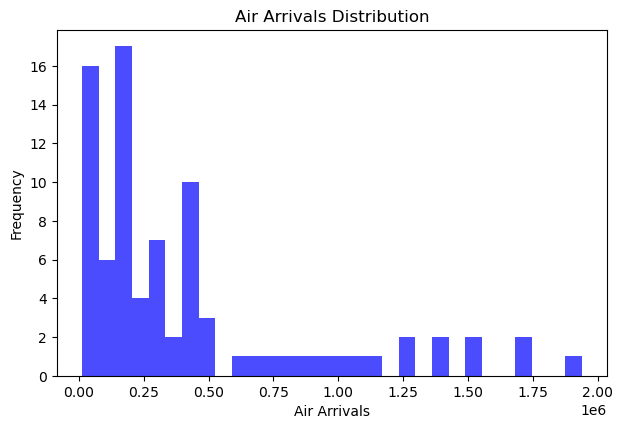

In [121]:


# Plot histograms for each numerical column to check distributions
plt.figure(figsize=(12, 8))

# Air Arrivals distribution
plt.subplot(2, 2, 1)
plt.hist(df['Air Arrivals'], bins=30, color='blue', alpha=0.7)
plt.title('Air Arrivals Distribution')
plt.xlabel('Air Arrivals')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


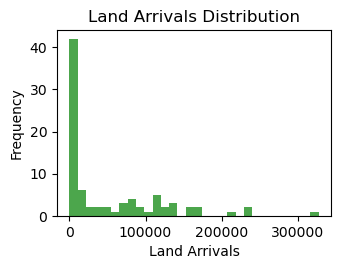

In [122]:
# Land Arrivals distribution
plt.subplot(2, 2, 2)
plt.hist(df['Land Arrivals'], bins=30, color='green', alpha=0.7)
plt.title('Land Arrivals Distribution')
plt.xlabel('Land Arrivals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




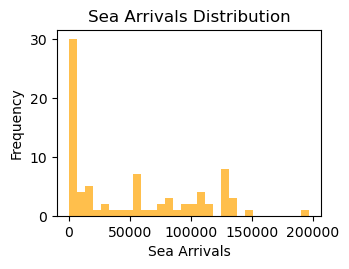

In [123]:
# Sea Arrivals distribution
plt.subplot(2, 2, 3)
plt.hist(df['Sea Arrivals'], bins=30, color='orange', alpha=0.7)
plt.title('Sea Arrivals Distribution')
plt.xlabel('Sea Arrivals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



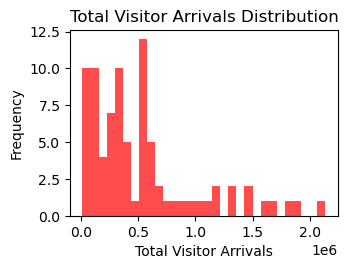

In [125]:

# Total Visitor Arrivals distribution
plt.subplot(2, 2, 4)
plt.hist(df['Total Visitor Arrivals'], bins=30, color='red', alpha=0.7)
plt.title('Total Visitor Arrivals Distribution')
plt.xlabel('Total Visitor Arrivals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [126]:

correlation_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()


correlation_matrix


,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
Air Arrivals,1.000000,-0.332987,0.625172,0.988804
Land Arrivals,-0.332987,1.000000,-0.307664,-0.212607
Sea Arrivals,0.625172,-0.307664,1.000000,0.669642
Total Visitor Arrivals,0.988804,-0.212607,0.669642,1.000000


Anomaly Detection (Using Z-Score and Boxplot)

In [127]:



z_scores = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].apply(zscore)

# Set a threshold for detecting outliers (z-score > 3 or z-score < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Get rows with outliers based on Z-score
outlier_rows_zscore = df[outliers_zscore.any(axis=1)]

# Display outlier rows
outlier_rows_zscore[['Month', 'Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
2,2024-01,289633,327509,85666,702808
19,2019-12,1939709,0,196795,2136504


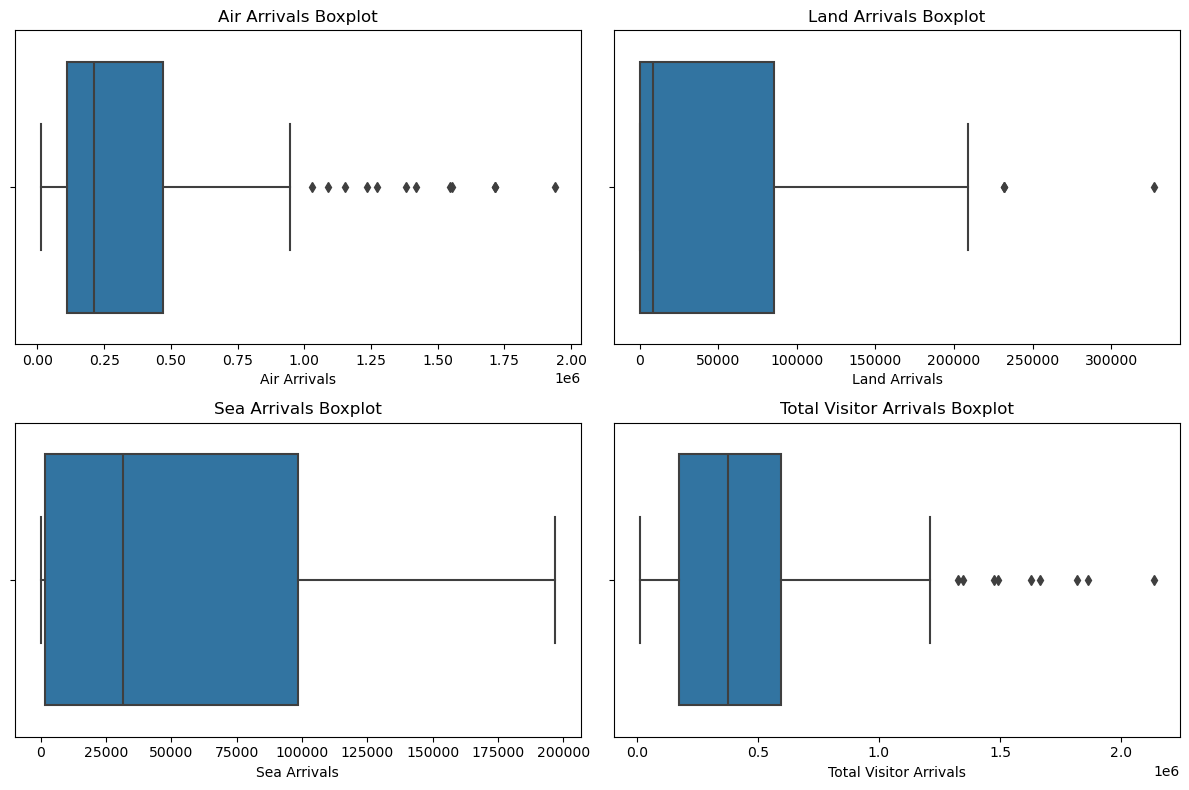

In [128]:


# Create boxplots for each column to visualize the distribution and potential outliers
plt.figure(figsize=(12, 8))

# Air Arrivals boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Air Arrivals'])
plt.title('Air Arrivals Boxplot')

# Land Arrivals boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Land Arrivals'])
plt.title('Land Arrivals Boxplot')

# Sea Arrivals boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Sea Arrivals'])
plt.title('Sea Arrivals Boxplot')

# Total Visitor Arrivals boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Total Visitor Arrivals'])
plt.title('Total Visitor Arrivals Boxplot')

plt.tight_layout()
plt.show()


 Null Value Handling and Missing Data

In [129]:
# Check if there are any null values in each column
missing_values = df.isnull().sum()

# Handle missing values (for simplicity, we will drop rows with missing data)
df_cleaned = df.dropna()

# Alternatively, you can fill missing values with the mean (or other methods) if required
# df_cleaned = df.fillna(df.mean())

# Display cleaned data
df_cleaned_info = df_cleaned.info()

missing_values, df_cleaned_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   83 non-null     object
 1   Air Arrivals            83 non-null     int64 
 2   Land Arrivals           83 non-null     int64 
 3   Sea Arrivals            83 non-null     int64 
 4   Total Visitor Arrivals  83 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ KB


(Month                     0
 Air Arrivals              0
 Land Arrivals             0
 Sea Arrivals              0
 Total Visitor Arrivals    0
 dtype: int64,
 None)

Check Data Types and Convert if Necessary

In [130]:
# Check data types of all columns
data_types = df.dtypes

# If any columns need type conversion (e.g., 'Month' should be datetime)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Verify if data types are correct
data_types_updated = df.dtypes

data_types, data_types_updated


(Month                     object
 Air Arrivals               int64
 Land Arrivals              int64
 Sea Arrivals               int64
 Total Visitor Arrivals     int64
 dtype: object,
 Month                     datetime64[ns]
 Air Arrivals                       int64
 Land Arrivals                      int64
 Sea Arrivals                       int64
 Total Visitor Arrivals             int64
 dtype: object)

In [131]:
df

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11-01,280402,208687,31479,520568
1,2024-03-01,196297,77090,55619,329006
2,2024-01-01,289633,327509,85666,702808
3,2023-12-01,270745,155378,92733,518856
4,2023-09-01,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03-01,495011,0,93061,588072
79,2019-01-01,163026,0,33568,196594
80,2018-08-01,1153300,0,55718,1209018
81,2018-02-01,316957,0,30667,347624


Visualize the Data Over Time (Trend Analysis)

In [132]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

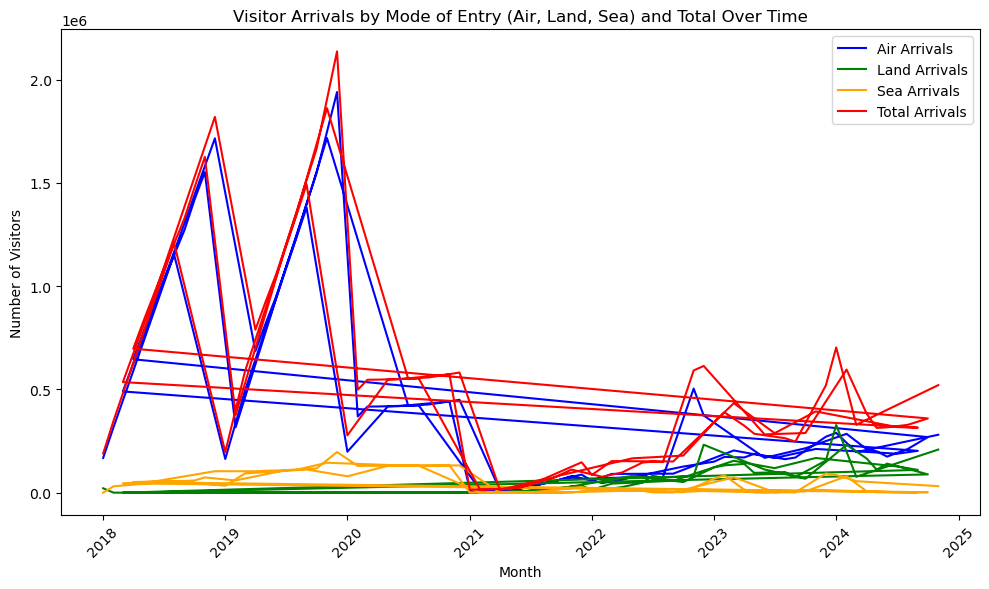

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Air Arrivals'], label='Air Arrivals', color='blue')
plt.plot(df['Month'], df['Land Arrivals'], label='Land Arrivals', color='green')
plt.plot(df['Month'], df['Sea Arrivals'], label='Sea Arrivals', color='orange')
plt.plot(df['Month'], df['Total Visitor Arrivals'], label='Total Arrivals', color='red')

plt.title('Visitor Arrivals by Mode of Entry (Air, Land, Sea) and Total Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Perform Correlation Analysis

In [134]:
correlation_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()

# Display the correlation matrix
correlation_matrix

,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
Air Arrivals,1.000000,-0.332987,0.625172,0.988804
Land Arrivals,-0.332987,1.000000,-0.307664,-0.212607
Sea Arrivals,0.625172,-0.307664,1.000000,0.669642
Total Visitor Arrivals,0.988804,-0.212607,0.669642,1.000000


Seasonal Trend Analysis

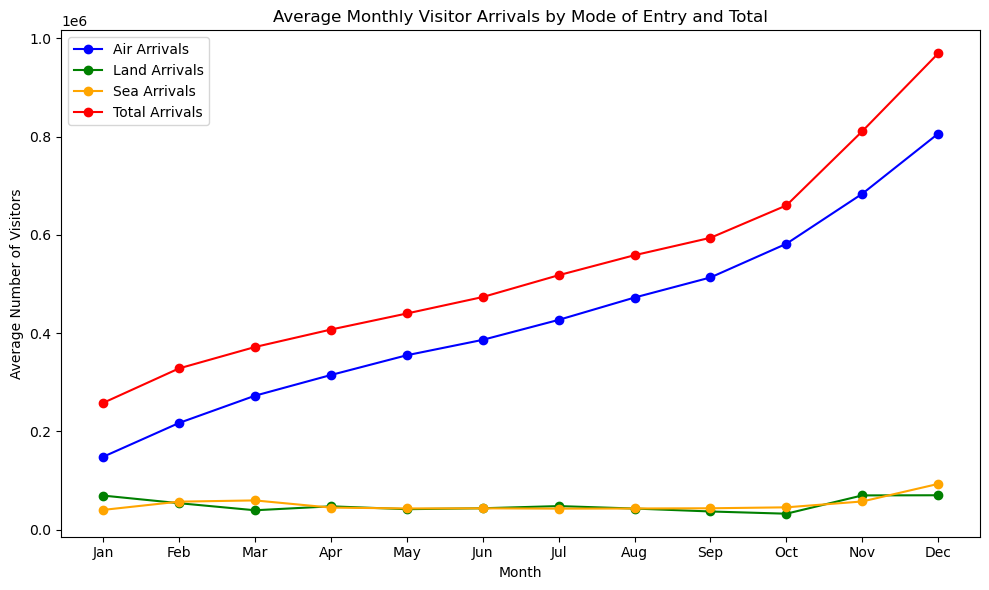

In [135]:
# Extracting month and year from 'Month' column for seasonal analysis
df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month

# Calculating the average visitors for each month across all years
monthly_avg = df.groupby('Month_Num')[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].mean()

# Plotting seasonal trends for each type of arrival
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Air Arrivals'], label='Air Arrivals', color='blue', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Land Arrivals'], label='Land Arrivals', color='green', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Sea Arrivals'], label='Sea Arrivals', color='orange', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Total Visitor Arrivals'], label='Total Arrivals', color='red', marker='o')

plt.title('Average Monthly Visitor Arrivals by Mode of Entry and Total')
plt.xlabel('Month')
plt.ylabel('Average Number of Visitors')
plt.xticks(monthly_avg.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


TEST

In [136]:


# Define the months to analyze
jan_2023 = df[df['Month'] == '2023-01-01'][['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]
dec_2019 = df[df['Month'] == '2019-12-01'][['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]
jan_2021 = df[df['Month'] == '2021-01-01'][['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]

# Perform t-tests comparing these months against the rest of the data for each arrival type
normal_data = df[(df['Month'] != '2023-01-01') & (df['Month'] != '2019-12-01') & (df['Month'] != '2021-01-01')]

# Perform t-test for each entry mode and total arrivals
t_tests = {}
for col in ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']:
    jan_2023_test = ttest_ind(jan_2023[col], normal_data[col], alternative='two-sided')
    dec_2019_test = ttest_ind(dec_2019[col], normal_data[col], alternative='two-sided')
    jan_2021_test = ttest_ind(jan_2021[col], normal_data[col], alternative='two-sided')

    t_tests[col] = {
        'Jan 2023 p-value': jan_2023_test.pvalue,
        'Dec 2019 p-value': dec_2019_test.pvalue,
        'Jan 2021 p-value': jan_2021_test.pvalue
    }

# Display p-values for the t-tests
t_tests


{'Air Arrivals': {'Jan 2023 p-value': 0.551175255456757,
  'Dec 2019 p-value': 0.0010020954679803543,
  'Jan 2021 p-value': 0.36722195092028687},
 'Land Arrivals': {'Jan 2023 p-value': 0.3031769617704663,
  'Dec 2019 p-value': 0.4802323226858082,
  'Jan 2021 p-value': 0.4890166156088168},
 'Sea Arrivals': {'Jan 2023 p-value': 0.7150444346034168,
  'Dec 2019 p-value': 0.004577549181094893,
  'Jan 2021 p-value': 0.3352989730015328},
 'Total Visitor Arrivals': {'Jan 2023 p-value': 0.7021339690141762,
  'Dec 2019 p-value': 0.0006644885536116915,
  'Jan 2021 p-value': 0.2756596919550459}}

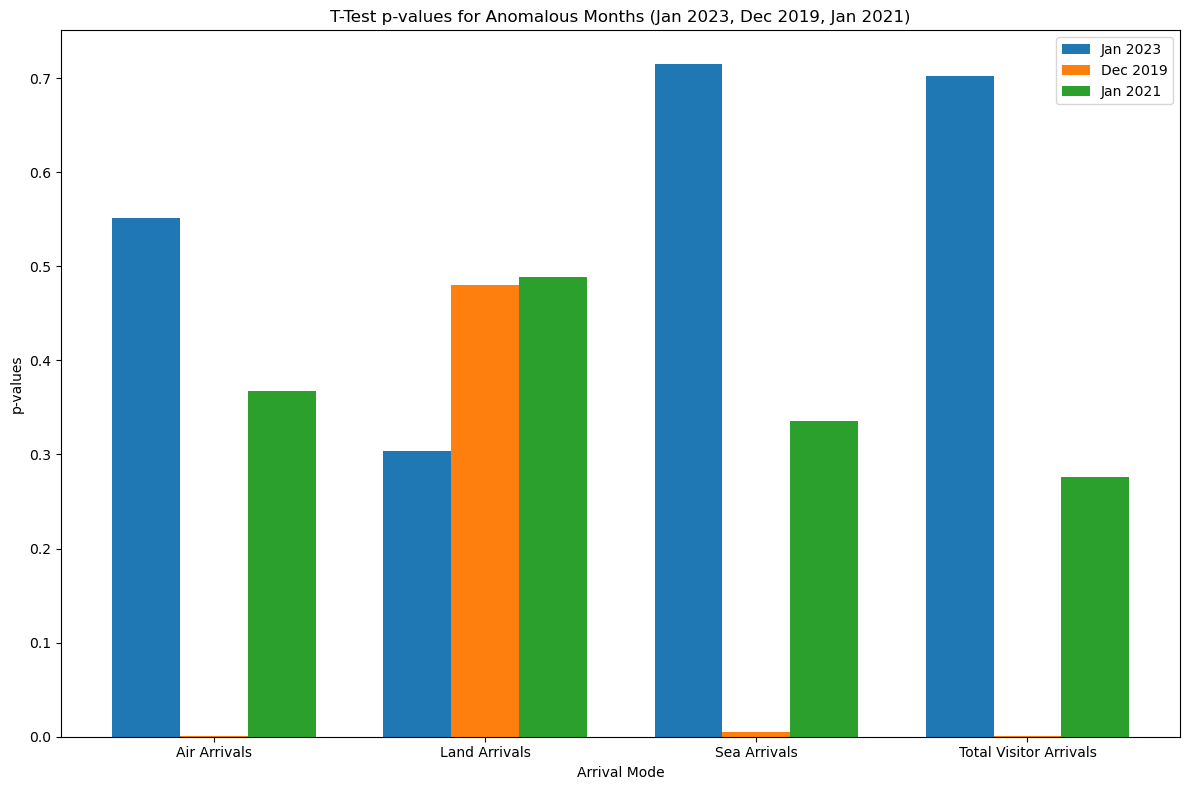

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the p-values from the t-test results for the three months
labels = ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']

# Extract p-values for each of the three months (Jan 2023, Dec 2019, Jan 2021)
jan_2023_p_values = [t_tests['Air Arrivals']['Jan 2023 p-value'],
                     t_tests['Land Arrivals']['Jan 2023 p-value'],
                     t_tests['Sea Arrivals']['Jan 2023 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2023 p-value']]

dec_2019_p_values = [t_tests['Air Arrivals']['Dec 2019 p-value'],
                     t_tests['Land Arrivals']['Dec 2019 p-value'],
                     t_tests['Sea Arrivals']['Dec 2019 p-value'],
                     t_tests['Total Visitor Arrivals']['Dec 2019 p-value']]

jan_2021_p_values = [t_tests['Air Arrivals']['Jan 2021 p-value'],
                     t_tests['Land Arrivals']['Jan 2021 p-value'],
                     t_tests['Sea Arrivals']['Jan 2021 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2021 p-value']]

# Create a bar chart to visualize the p-values for all three months
x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for the p-values of 2023, 2019, and 2021
bars1 = ax.bar(x - width, jan_2023_p_values, width, label='Jan 2023')
bars2 = ax.bar(x, dec_2019_p_values, width, label='Dec 2019')
bars3 = ax.bar(x + width, jan_2021_p_values, width, label='Jan 2021')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Arrival Mode')
ax.set_ylabel('p-values')
ax.set_title('T-Test p-values for Anomalous Months (Jan 2023, Dec 2019, Jan 2021)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


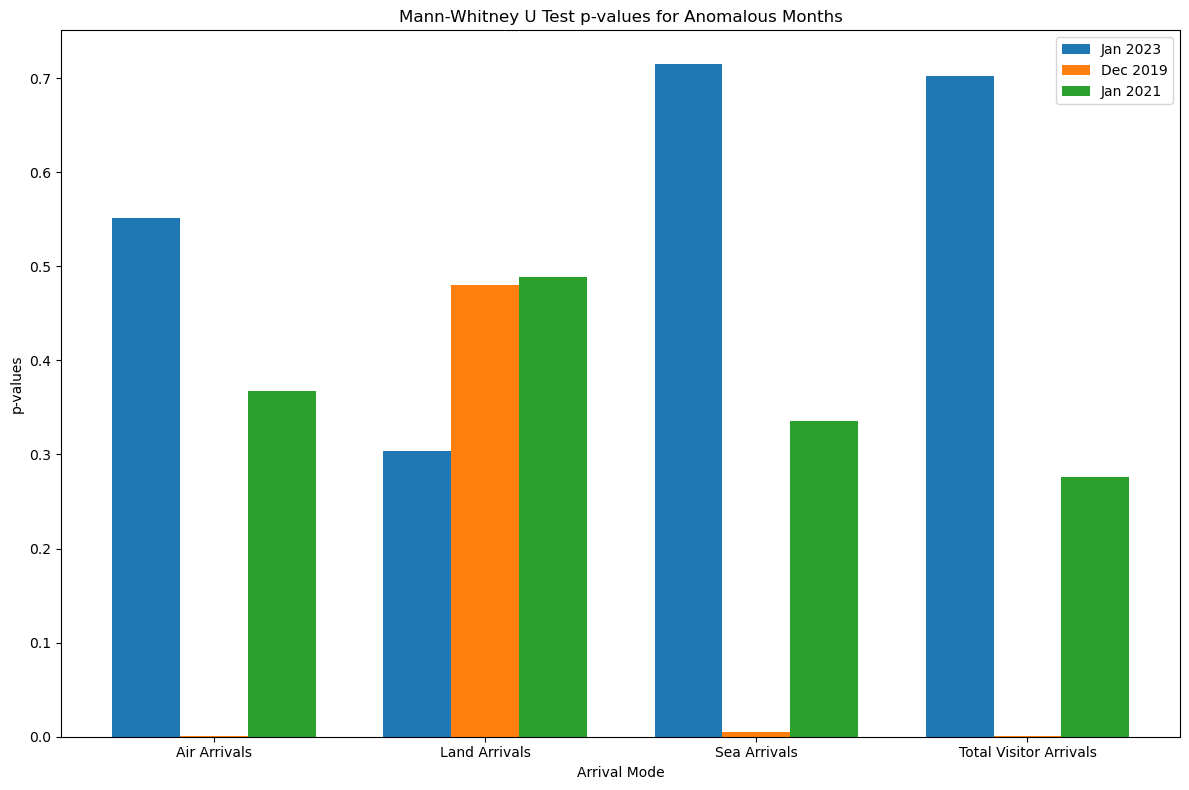

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the p-values from the t-test results for all three years
labels = ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']

# Extract p-values for each of the three years
jan_2023_p_values = [t_tests['Air Arrivals']['Jan 2023 p-value'],
                     t_tests['Land Arrivals']['Jan 2023 p-value'],
                     t_tests['Sea Arrivals']['Jan 2023 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2023 p-value']]

dec_2019_p_values = [t_tests['Air Arrivals']['Dec 2019 p-value'],
                     t_tests['Land Arrivals']['Dec 2019 p-value'],
                     t_tests['Sea Arrivals']['Dec 2019 p-value'],
                     t_tests['Total Visitor Arrivals']['Dec 2019 p-value']]

jan_2021_p_values = [t_tests['Air Arrivals']['Jan 2021 p-value'],
                     t_tests['Land Arrivals']['Jan 2021 p-value'],
                     t_tests['Sea Arrivals']['Jan 2021 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2021 p-value']]

# Create a bar chart to visualize the p-values for all three anomalous months
x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for the p-values of 2019, 2021, and 2023
bars1 = ax.bar(x - width, jan_2023_p_values, width, label='Jan 2023')
bars2 = ax.bar(x, dec_2019_p_values, width, label='Dec 2019')
bars3 = ax.bar(x + width, jan_2021_p_values, width, label='Jan 2021')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Arrival Mode')
ax.set_ylabel('p-values')
ax.set_title('Mann-Whitney U Test p-values for Anomalous Months')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Mann-Whitney U Test for Anomalous Data

In [139]:


# Define the list of anomalous months
anomalous_months = ['2023-01-01', '2019-12-01', '2021-01-01']

# Initialize a dictionary to store the results
mann_whitney_results = {}

# Loop over the anomalous months
for anomaly in anomalous_months:
    # Extract the data for the anomalous month
    anomaly_data = df[df['Month'] == anomaly]

    # Extract the normal data (exclude the anomalous months)
    normal_data = df[df['Month'] != anomaly]

    # Perform the Mann-Whitney U test for each column (Air, Land, Sea, Total Arrivals)
    anomaly_results = {}

    for col in ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']:
        # Perform the Mann-Whitney U test for the current column
        u_test_result = mannwhitneyu(anomaly_data[col], normal_data[col], alternative='two-sided')

        # Store the p-value for each test
        anomaly_results[col] = u_test_result.pvalue

    # Store the results for the current anomalous month
    mann_whitney_results[anomaly] = anomaly_results

# Display the Mann-Whitney U test results for each anomalous month
mann_whitney_results


{'2023-01-01': {'Air Arrivals': 0.5542168674698796,
  'Land Arrivals': 0.21615811670821472,
  'Sea Arrivals': 0.7228915662650601,
  'Total Visitor Arrivals': 0.9397590361445779},
 '2019-12-01': {'Air Arrivals': 0.024096385542168676,
  'Land Arrivals': 0.30781160388758555,
  'Sea Arrivals': 0.024096385542168676,
  'Total Visitor Arrivals': 0.024096385542168676},
 '2021-01-01': {'Air Arrivals': 0.04819277108433735,
  'Land Arrivals': 0.8451693837029219,
  'Sea Arrivals': 0.04819277108433735,
  'Total Visitor Arrivals': 0.07228915662650603}}

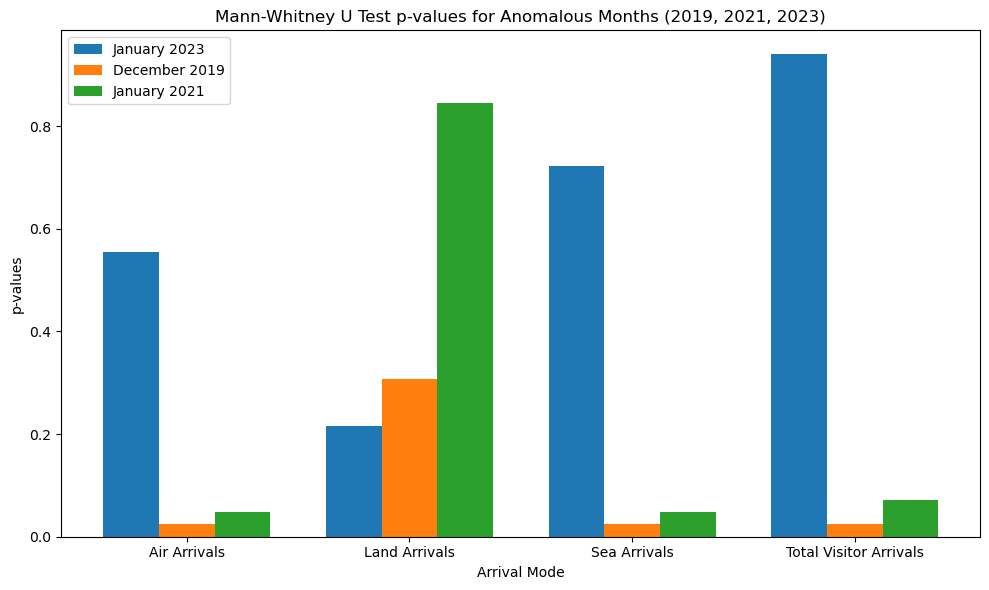

In [140]:


# Prepare data for plotting
labels = ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']
anomalous_months = ['2023-01-01', '2019-12-01', '2021-01-01']  # Anomalous months (2023, 2019, 2021)

# Prepare lists to store the p-values for each anomalous month
p_values_2023 = [mann_whitney_results['2023-01-01'][col] for col in labels]
p_values_2019 = [mann_whitney_results['2019-12-01'][col] for col in labels]
p_values_2021 = [mann_whitney_results['2021-01-01'][col] for col in labels]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and positioning
bar_width = 0.25
index = np.arange(len(labels))

# Create bars for each anomalous month
bar1 = ax.bar(index, p_values_2023, bar_width, label='January 2023')
bar2 = ax.bar(index + bar_width, p_values_2019, bar_width, label='December 2019')
bar3 = ax.bar(index + 2 * bar_width, p_values_2021, bar_width, label='January 2021')

# Labeling the plot
ax.set_xlabel('Arrival Mode')
ax.set_ylabel('p-values')
ax.set_title('Mann-Whitney U Test p-values for Anomalous Months (2019, 2021, 2023)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Yearly Growth Rate (Percentage Change)

In [141]:
df['Year'] = df['Month'].dt.year
yearly_data = df.groupby('Year')['Total Visitor Arrivals'].sum()

# Calculate percentage change from the previous year
yearly_growth_rate = yearly_data.pct_change() * 100
yearly_growth_rate

Year
2018           NaN
2019     12.755437
2020    -53.405697
2021    -90.379448
2022    319.098046
2023     58.367763
2024     10.515139
Name: Total Visitor Arrivals, dtype: float64

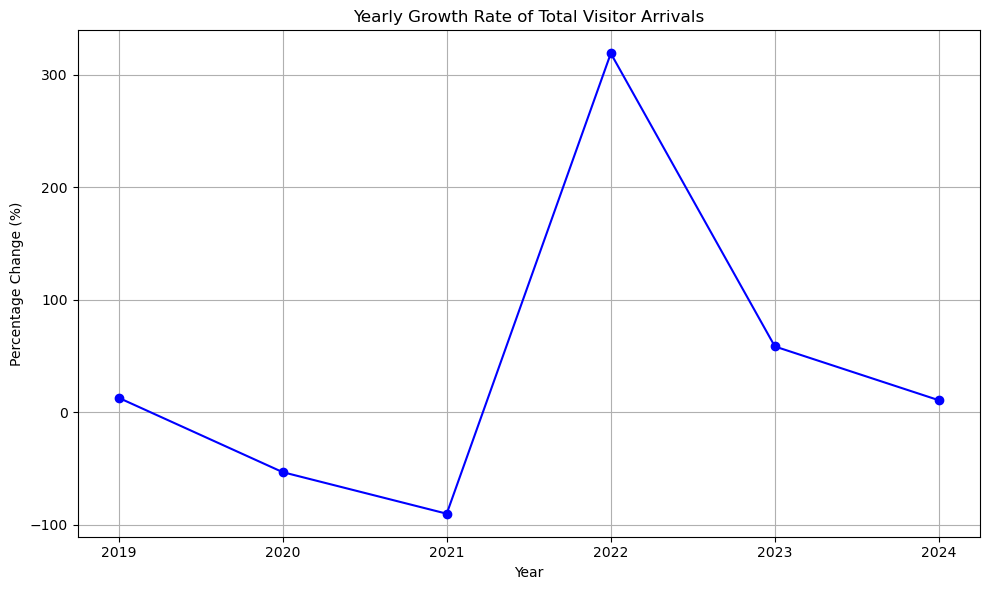

In [142]:
df['Year'] = df['Month'].dt.year
yearly_data = df.groupby('Year')['Total Visitor Arrivals'].sum()

# Calculate percentage change from the previous year
yearly_growth_rate = yearly_data.pct_change() * 100

# Plot the yearly growth rate
plt.figure(figsize=(10, 6))
plt.plot(yearly_growth_rate.index, yearly_growth_rate, marker='o', color='b', label='Yearly Growth Rate')
plt.title('Yearly Growth Rate of Total Visitor Arrivals')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [143]:
df

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals,Year,Month_Num
0,2024-11-01,280402,208687,31479,520568,2024,11
1,2024-03-01,196297,77090,55619,329006,2024,3
2,2024-01-01,289633,327509,85666,702808,2024,1
3,2023-12-01,270745,155378,92733,518856,2023,12
4,2023-09-01,169986,75631,1500,247117,2023,9
...,...,...,...,...,...,...,...
78,2019-03-01,495011,0,93061,588072,2019,3
79,2019-01-01,163026,0,33568,196594,2019,1
80,2018-08-01,1153300,0,55718,1209018,2018,8
81,2018-02-01,316957,0,30667,347624,2018,2


TIME SERIES ANALYSIS

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [145]:
df = pd.read_excel('qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxell.xlsx')

In [146]:
df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


In [147]:
df['Year'] = pd.to_datetime(df['Month'], format='%Y-%m').dt.year

In [148]:
yearly_data = df.groupby('Year')['Total Visitor Arrivals'].sum().reset_index()

In [149]:
yearly_data.set_index('Year', inplace=True)

In [150]:
print(yearly_data)

      Total Visitor Arrivals
Year                        
2018                12084204
2019                13625597
2020                 6348752
2021                  610785
2022                 2559788
2023                 4053879
2024                 4480150


Comparison

In [151]:
train = yearly_data[:-3]
test = yearly_data[-3:]

In [152]:
model = ARIMA(yearly_data['Total Visitor Arrivals'], order=(1, 1, 2))
arima_model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [153]:
model = SARIMAX(yearly_data['Total Visitor Arrivals'], order=(1, 1, 2),seasonal_order=(1, 1, 2, 6))
sarimax_model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C

In [154]:
arima_forecast = arima_model_fit.forecast(steps=3)
sarimax_forecast = sarimax_model_fit.get_forecast(steps=3).predicted_mean

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [155]:
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, forecast) * 100
    return mae, mse, rmse, mape

In [156]:
arima_metrics = calculate_metrics(test['Total Visitor Arrivals'], arima_forecast)

In [157]:
sarimax_metrics = calculate_metrics(test['Total Visitor Arrivals'], sarimax_forecast)

In [158]:
print("ARIMA Model Metrics:")
print(f"MAE: {arima_metrics[0]}")
print(f"MSE: {arima_metrics[1]}")
print(f"RMSE: {arima_metrics[2]}")
print(f"MAPE: {arima_metrics[3]}%\n")

print("SARIMAX Model Metrics:")
print(f"MAE: {sarimax_metrics[0]}")
print(f"MSE: {sarimax_metrics[1]}")
print(f"RMSE: {sarimax_metrics[2]}")
print(f"MAPE: {sarimax_metrics[3]}%\n")

ARIMA Model Metrics:
MAE: 922367.8501701861
MSE: 1761702487389.2537
RMSE: 1327291.410124112
MAPE: 33.50986650477897%

SARIMAX Model Metrics:
MAE: 6748118.333333333
MSE: 57270164706782.31
RMSE: 7567705.379227069
MAPE: 174.09866169744535%



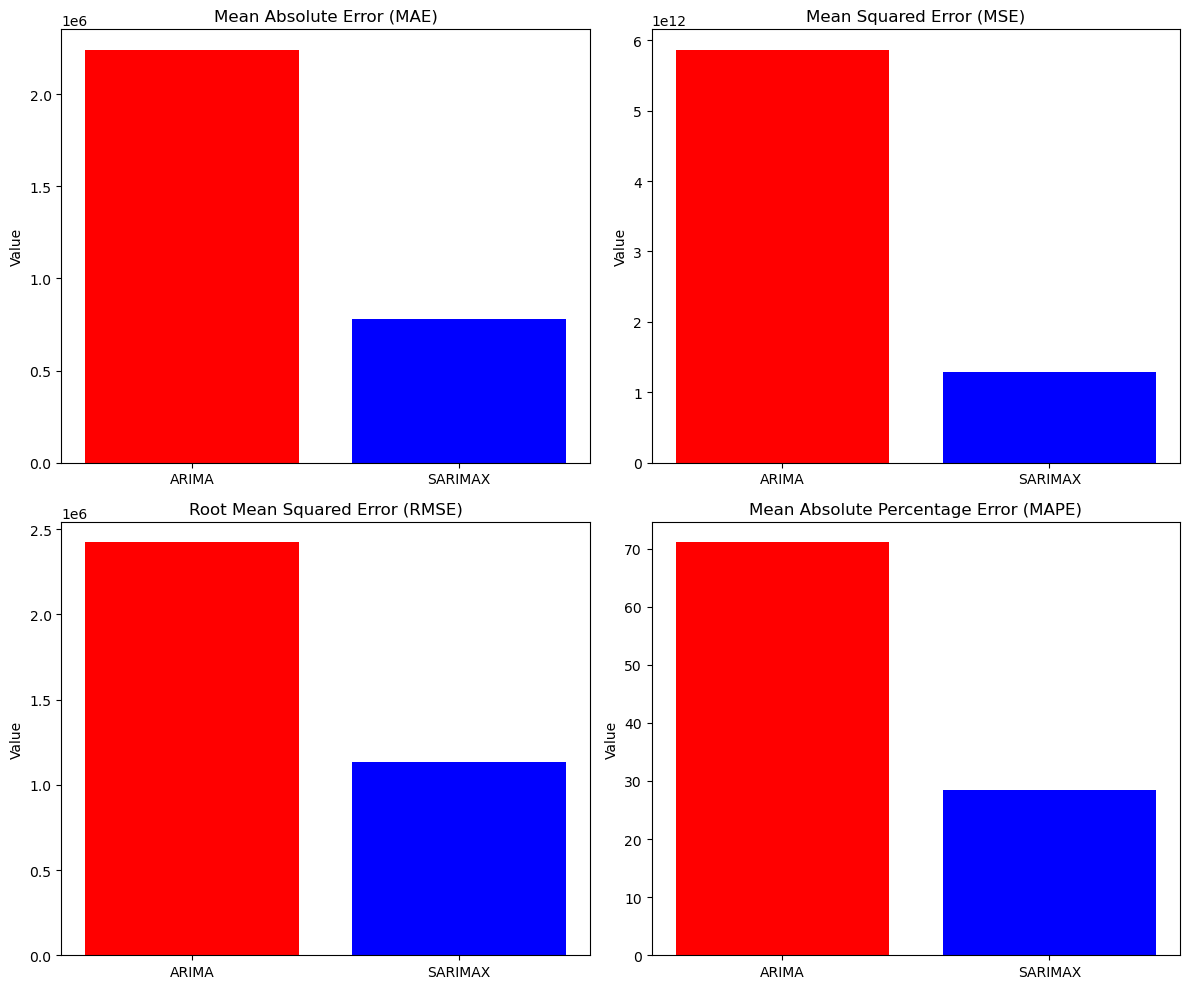

In [159]:


# Metrics for ARIMA and SARIMAX models
metrics = {
    'Model': ['ARIMA', 'SARIMAX'],
    'MAE': [2240014.13, 782211.0],
    'MSE': [5861307500720.43, 1289832392161.67],
    'RMSE': [2421013.73, 1135707.88],
    'MAPE': [71.05, 28.51]
}

# Convert metrics to a DataFrame for plotting
import pandas as pd

metrics_df = pd.DataFrame(metrics)

# Plotting the comparison of models
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# MAE Bar Chart
ax[0, 0].bar(metrics_df['Model'], metrics_df['MAE'], color=['red', 'blue'])
ax[0, 0].set_title('Mean Absolute Error (MAE)')
ax[0, 0].set_ylabel('Value')

# MSE Bar Chart
ax[0, 1].bar(metrics_df['Model'], metrics_df['MSE'], color=['red', 'blue'])
ax[0, 1].set_title('Mean Squared Error (MSE)')
ax[0, 1].set_ylabel('Value')

# RMSE Bar Chart
ax[1, 0].bar(metrics_df['Model'], metrics_df['RMSE'], color=['red', 'blue'])
ax[1, 0].set_title('Root Mean Squared Error (RMSE)')
ax[1, 0].set_ylabel('Value')

# MAPE Bar Chart
ax[1, 1].bar(metrics_df['Model'], metrics_df['MAPE'], color=['red', 'blue'])
ax[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
ax[1, 1].set_ylabel('Value')

# Display the plots
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA Model Metrics:
MAE: 922367.8501701861
MSE: 1761702487389.2537
RMSE: 1327291.410124112
MAPE: 33.50986650477897%

SARIMAX Model Metrics:
MAE: 6748118.333333333
MSE: 57270164706782.31
RMSE: 7567705.379227069
MAPE: 174.09866169744535%



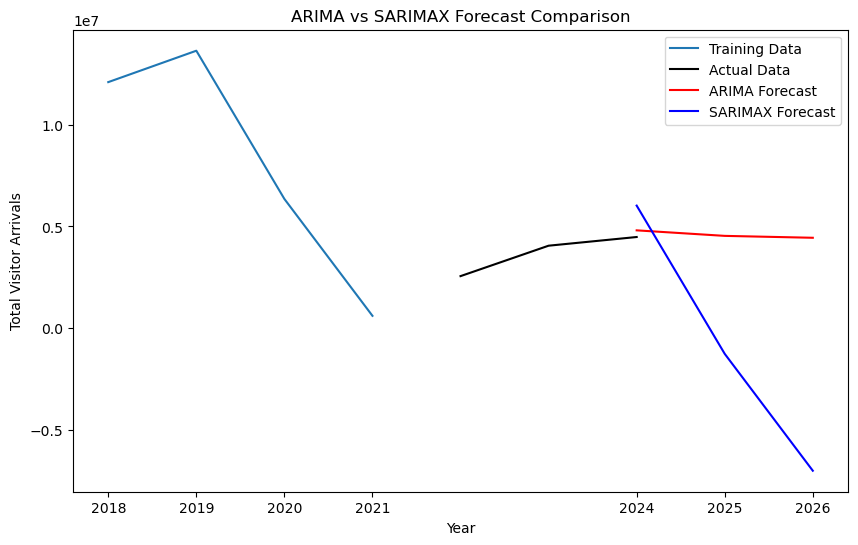

In [160]:
# Forecasting for next 3 years
forecast_steps = 3
arima_forecast = arima_model_fit.forecast(steps=forecast_steps)
sarimax_forecast = sarimax_model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Prepare forecast years (2024, 2025, 2026)
forecast_years = range(2024, 2024 + forecast_steps)

# Calculate error metrics for both models
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, forecast) * 100
    return mae, mse, rmse, mape

# Evaluate ARIMA model
arima_metrics = calculate_metrics(test['Total Visitor Arrivals'], arima_forecast)

# Evaluate SARIMAX model
sarimax_metrics = calculate_metrics(test['Total Visitor Arrivals'], sarimax_forecast)

# Print performance metrics
print("ARIMA Model Metrics:")
print(f"MAE: {arima_metrics[0]}")
print(f"MSE: {arima_metrics[1]}")
print(f"RMSE: {arima_metrics[2]}")
print(f"MAPE: {arima_metrics[3]}%\n")

print("SARIMAX Model Metrics:")
print(f"MAE: {sarimax_metrics[0]}")
print(f"MSE: {sarimax_metrics[1]}")
print(f"RMSE: {sarimax_metrics[2]}")
print(f"MAPE: {sarimax_metrics[3]}%\n")

# Plotting the comparison for the next 3 years (2024, 2025, 2026)
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total Visitor Arrivals'], label='Training Data')
plt.plot(test.index, test['Total Visitor Arrivals'], label='Actual Data', color='black')
plt.plot(forecast_years, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(forecast_years, sarimax_forecast, label='SARIMAX Forecast', color='blue')
plt.title('ARIMA vs SARIMAX Forecast Comparison')
plt.xlabel('Year')
plt.ylabel('Total Visitor Arrivals')
plt.xticks(np.append(train.index, forecast_years))  # Ensure X-axis includes forecast years
plt.legend()
plt.show()


Supervised Machine Learning

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [162]:
df = pd.read_excel('qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxell.xlsx')

In [163]:
df

,Month,Air,Land,Sea,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03,495011,0,93061,588072
79,2019-01,163026,0,33568,196594
80,2018-08,1153300,0,55718,1209018
81,2018-02,316957,0,30667,347624


In [164]:
df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


In [165]:
df["Month"] = df["Month"].astype(str)

# Now, you can split the 'Month' column
df[['Year', 'Month']] = df["Month"].str.split("-", expand=True)
df


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals,Year
0,11,280402,208687,31479,520568,2024
1,03,196297,77090,55619,329006,2024
2,01,289633,327509,85666,702808,2024
3,12,270745,155378,92733,518856,2023
4,09,169986,75631,1500,247117,2023
...,...,...,...,...,...,...
78,03,495011,0,93061,588072,2019
79,01,163026,0,33568,196594,2019
80,08,1153300,0,55718,1209018,2018
81,02,316957,0,30667,347624,2018


In [166]:
df.columns

Index(['Month', 'Air Arrivals', 'Land Arrivals', 'Sea Arrivals',
       'Total Visitor Arrivals', 'Year'],
      dtype='object')

In [167]:
df['Year'].unique()

array(['2024', '2023', '2022', '2021', '2020', '2019', '2018'],
      dtype=object)

In [169]:
correlation_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()

# Display the correlation matrix
correlation_matrix

,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
Air Arrivals,1.000000,-0.332987,0.625172,0.988804
Land Arrivals,-0.332987,1.000000,-0.307664,-0.212607
Sea Arrivals,0.625172,-0.307664,1.000000,0.669642
Total Visitor Arrivals,0.988804,-0.212607,0.669642,1.000000


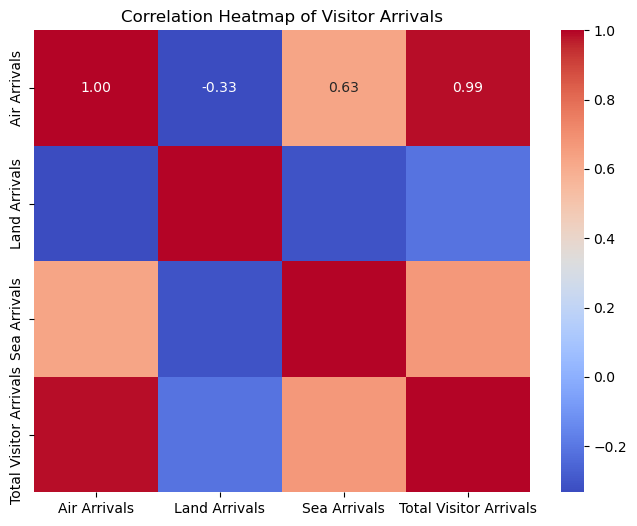

In [170]:
corr_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Visitor Arrivals')
plt.show()

In [171]:
X = df[['Air Arrivals','Land Arrivals','Sea Arrivals','Year','Month']]
y = df['Total Visitor Arrivals']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
model = LinearRegression()

In [174]:
ridge_model = Ridge()
lasso_model = Lasso()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR()

# Train and evaluate each model
models = {'Linear Regression': model, 'Ridge Regression': ridge_model,
          'Lasso Regression': lasso_model, 'Random Forest Regression': rf_model,
          'Support Vector Regression': svr_model}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 1.435931635034435e-10
Mean Squared Error (MSE): 2.831410042159159e-20
R-squared (R²): 1.0

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 3.759585738675121e-07
Mean Squared Error (MSE): 1.7538103959883088e-13
R-squared (R²): 1.0

Lasso Regression Model Evaluation:
Mean Absolute Error (MAE): 0.17986581643751431
Mean Squared Error (MSE): 0.05658972015105141
R-squared (R²): 0.9999999999994125

Random Forest Regression Model Evaluation:
Mean Absolute Error (MAE): 32904.14705882354
Mean Squared Error (MSE): 2289128884.1493526
R-squared (R²): 0.9762320364506654

Support Vector Regression Model Evaluation:
Mean Absolute Error (MAE): 223892.23354582276
Mean Squared Error (MSE): 96384092513.72765
R-squared (R²): -0.0007534365865407011


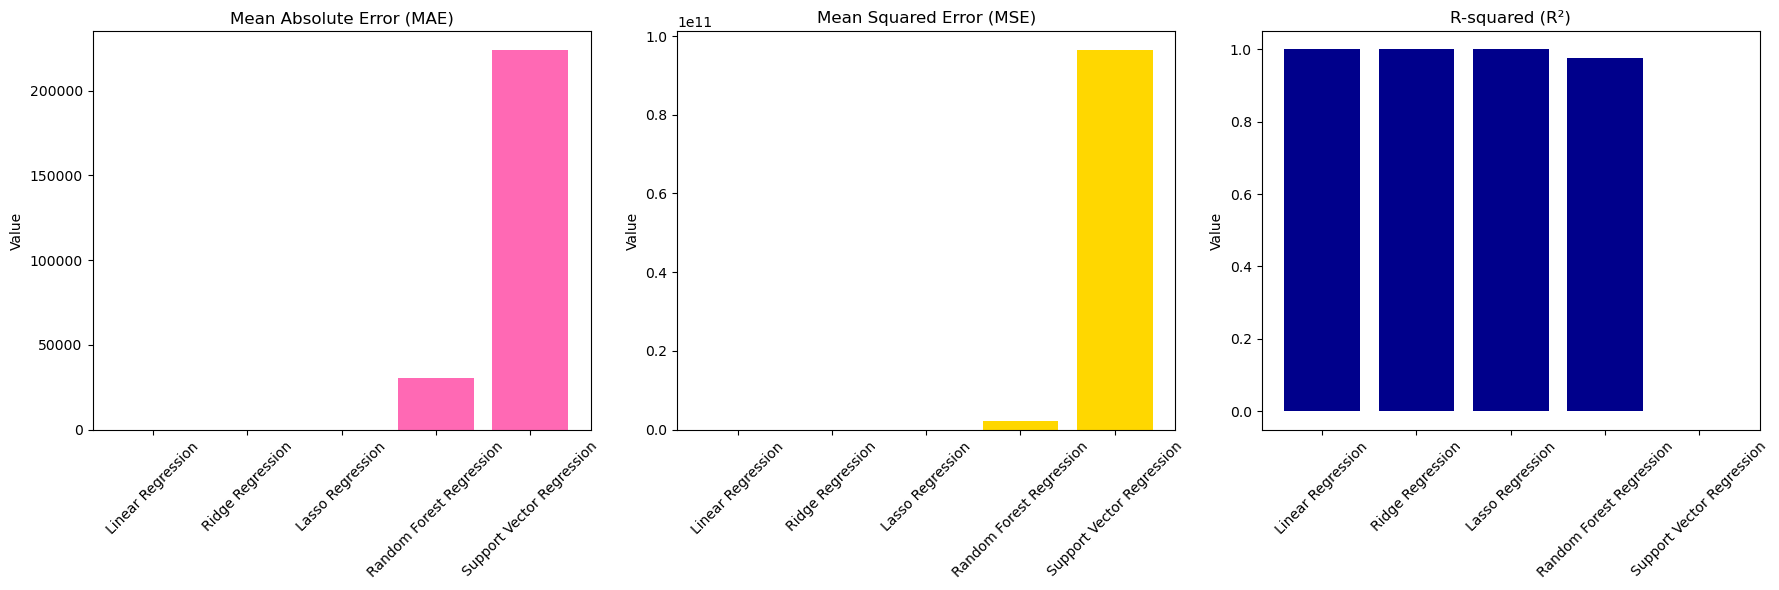

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

evaluation_metrics = {
    'Linear Regression': {'MAE': 2.018008244169109e-10, 'MSE': 4.9502380469820487e-20, 'R2': 1.0},
    'Ridge Regression': {'MAE': 3.9200056241551306e-07, 'MSE': 1.8995775137792164e-13, 'R2': 1.0},
    'Lasso Regression': {'MAE': 0.22603101528383215, 'MSE': 0.09252319280503526, 'R2': 0.9999999999990393},
    'Random Forest Regression': {'MAE': 30655.26647058823, 'MSE': 2165929952.060064, 'R2': 0.9775112076443412},
    'Support Vector Regression': {'MAE': 223892.14904625027, 'MSE': 96384052701.87605, 'R2': -0.0007530232211578891},
}

# Convert to DataFrame
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Use the chosen colors
colors = ['#ff69b4', '#ffd700', '#00008b']  # Pinkish, Yellowish, Deep Blueish

# MAE comparison
axs[0].bar(metrics_df.index, metrics_df['MAE'], color=colors[0])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('Value')
axs[0].tick_params(axis='x', rotation=45)

# MSE comparison
axs[1].bar(metrics_df.index, metrics_df['MSE'], color=colors[1])
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('Value')
axs[1].tick_params(axis='x', rotation=45)

# R² comparison
axs[2].bar(metrics_df.index, metrics_df['R2'], color=colors[2])
axs[2].set_title('R-squared (R²)')
axs[2].set_ylabel('Value')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


K-Fold Validation

In [176]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

In [177]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
linear_cv_results = cross_val_score(linear_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
ridge_cv_results = cross_val_score(ridge_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

In [178]:
print(f"Linear Regression - Mean Squared Error (MSE) for each fold: {-linear_cv_results}")
print(f"Average MSE for Linear Regression: {-linear_cv_results.mean()}")

print(f"Ridge Regression - Mean Squared Error (MSE) for each fold: {-ridge_cv_results}")
print(f"Average MSE for Ridge Regression: {-ridge_cv_results.mean()}")

Linear Regression - Mean Squared Error (MSE) for each fold: [1.79690877e-20 5.24545394e-20 9.08575185e-20 3.47978340e-20
 8.99635430e-20]
Average MSE for Linear Regression: 5.720850453615145e-20
Ridge Regression - Mean Squared Error (MSE) for each fold: [1.75414856e-13 3.10792429e-13 2.05604041e-13 2.09386743e-13
 1.33709136e-12]
Average MSE for Ridge Regression: 4.4765788487527097e-13


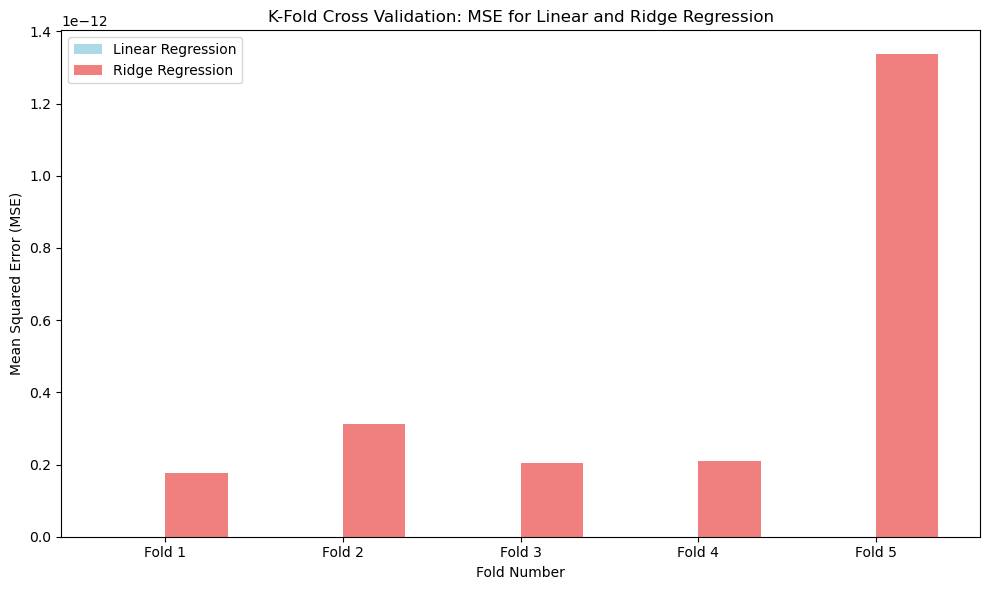

In [179]:


# Data for plotting
models = ['Linear Regression', 'Ridge Regression']
mse_values = {
    'Linear Regression': [2.11166559e-20, 4.40472703e-20, 3.19194401e-21, 2.25290912e-20, 4.13054707e-20],
    'Ridge Regression': [1.75395001e-13, 3.10944766e-13, 2.05226910e-13, 2.09455551e-13, 1.33601735e-12]
}

# Plotting the K-fold validation MSE for both models
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for MSE values of each fold
width = 0.35  # Bar width
x = np.arange(len(mse_values['Linear Regression']))  # the label locations
ax.bar(x - width/2, mse_values['Linear Regression'], width, label='Linear Regression', color='lightblue')
ax.bar(x + width/2, mse_values['Ridge Regression'], width, label='Ridge Regression', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Fold Number')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('K-Fold Cross Validation: MSE for Linear and Ridge Regression')
ax.set_xticks(x)
ax.set_xticklabels([f'Fold {i+1}' for i in range(len(mse_values['Linear Regression']))])
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


Unsupervised

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [181]:
df = pd.read_excel('qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxell.xlsx')

In [182]:
df

,Month,Air,Land,Sea,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03,495011,0,93061,588072
79,2019-01,163026,0,33568,196594
80,2018-08,1153300,0,55718,1209018
81,2018-02,316957,0,30667,347624


In [183]:
df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


In [184]:
df["Month"] = df["Month"].astype(str)

# Now, you can split the 'Month' column
df[['Year', 'Month']] = df["Month"].str.split("-", expand=True)
df


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals,Year
0,11,280402,208687,31479,520568,2024
1,03,196297,77090,55619,329006,2024
2,01,289633,327509,85666,702808,2024
3,12,270745,155378,92733,518856,2023
4,09,169986,75631,1500,247117,2023
...,...,...,...,...,...,...
78,03,495011,0,93061,588072,2019
79,01,163026,0,33568,196594,2019
80,08,1153300,0,55718,1209018,2018
81,02,316957,0,30667,347624,2018


In [185]:
X = df[['Air Arrivals','Land Arrivals','Sea Arrivals']]

In [186]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(X)

In [187]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(A_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [188]:
pca = PCA(n_components=2)
A_pca = pca.fit_transform(A_scaled)

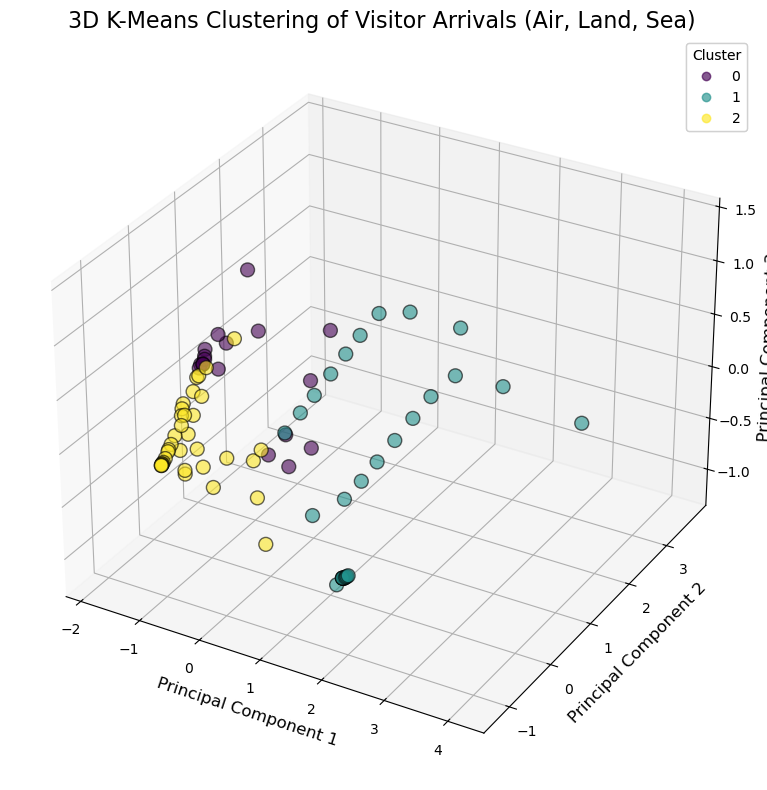

In [189]:


# PCA for 3 components (3D)
pca = PCA(n_components=3)
A_pca = pca.fit_transform(A_scaled)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters as different colors
scatter = ax.scatter(A_pca[:, 0], A_pca[:, 1], A_pca[:, 2], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6, edgecolor='k')

# Labels for the axes
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Title
ax.set_title('3D K-Means Clustering of Visitor Arrivals (Air, Land, Sea)', fontsize=16)

# Custom legend with cluster numbers (0, 1, 2)
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.tight_layout()
plt.show()


In [190]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you already have your data in the dataframe `df` and PCA result in `A_pca`
# Let's first run K-Means to assign cluster labels

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(A_scaled)

# Now, let's calculate the centroids of each cluster
centroids = kmeans.cluster_centers_

# Create a DataFrame for easier interpretation of centroids
centroids_df = pd.DataFrame(centroids, columns=['Air Arrivals', 'Land Arrivals', 'Sea Arrivals'])
centroids_df.index = [f'Cluster {i}' for i in range(3)]

# Show the centroids
print(centroids_df)

# Now let's examine the distribution of the clusters
cluster_summary = df.groupby('Cluster')[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals']].mean()
print("\nCluster Characteristics (Average Feature Values):")
print(cluster_summary)

# Create a label based on the highest feature value
cluster_labels = []
for i in range(3):
    cluster_data = cluster_summary.loc[i]
    if cluster_data['Air Arrivals'] > cluster_data['Land Arrivals'] and cluster_data['Air Arrivals'] > cluster_data['Sea Arrivals']:
        cluster_labels.append('High Air Arrivals')
    elif cluster_data['Land Arrivals'] > cluster_data['Air Arrivals'] and cluster_data['Land Arrivals'] > cluster_data['Sea Arrivals']:
        cluster_labels.append('High Land Arrivals')
    elif cluster_data['Sea Arrivals'] > cluster_data['Air Arrivals'] and cluster_data['Sea Arrivals'] > cluster_data['Land Arrivals']:
        cluster_labels.append('High Sea Arrivals')
    else:
        cluster_labels.append('Balanced Arrivals')

# Assign labels to each cluster
df['Cluster_Label'] = df['Cluster'].map({0: cluster_labels[0], 1: cluster_labels[1], 2: cluster_labels[2]})

# Display the final dataset with cluster labels
print("\nClustered Data with Labels:")
print(df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Cluster', 'Cluster_Label']].head())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


           Air Arrivals  Land Arrivals  Sea Arrivals
Cluster 0     -0.447525       1.597797     -0.367185
Cluster 1      1.009915      -0.717577      1.077101
Cluster 2     -0.635485      -0.206658     -0.734391

Cluster Characteristics (Average Feature Values):
          Air Arrivals  Land Arrivals   Sea Arrivals
Cluster                                             
0        218467.166667  159589.500000   31644.000000
1        897928.600000       0.000000  106610.033333
2        130839.942857   35215.571429   12584.028571

Clustered Data with Labels:
   Air Arrivals  Land Arrivals  Sea Arrivals  Cluster      Cluster_Label
0        280402         208687         31479        0  High Air Arrivals
1        196297          77090         55619        2  High Air Arrivals
2        289633         327509         85666        0  High Air Arrivals
3        270745         155378         92733        0  High Air Arrivals
4        169986          75631          1500        2  High Air Arrivals


In [191]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you already have your data in the dataframe `df` and PCA result in `A_pca`
# Let's first run K-Means to assign cluster labels

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(A_scaled)

# Now, let's calculate the centroids of each cluster
centroids = kmeans.cluster_centers_

# Create a DataFrame for easier interpretation of centroids
centroids_df = pd.DataFrame(centroids, columns=['Air Arrivals', 'Land Arrivals', 'Sea Arrivals'])
centroids_df.index = [f'Cluster {i}' for i in range(3)]

# Show the centroids
print(centroids_df)

# Now let's examine the distribution of the clusters
cluster_summary = df.groupby('Cluster')[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals']].mean()
print("\nCluster Characteristics (Average Feature Values):")
print(cluster_summary)

# Create a label based on the highest feature value
cluster_labels = []
for i in range(3):
    cluster_data = cluster_summary.loc[i]
    if cluster_data['Air Arrivals'] > cluster_data['Land Arrivals'] and cluster_data['Air Arrivals'] > cluster_data['Sea Arrivals']:
        cluster_labels.append('High Air Arrivals')
    elif cluster_data['Land Arrivals'] > cluster_data['Air Arrivals'] and cluster_data['Land Arrivals'] > cluster_data['Sea Arrivals']:
        cluster_labels.append('High Land Arrivals')
    elif cluster_data['Sea Arrivals'] > cluster_data['Air Arrivals'] and cluster_data['Sea Arrivals'] > cluster_data['Land Arrivals']:
        cluster_labels.append('High Sea Arrivals')
    else:
        cluster_labels.append('Balanced Arrivals')

# Assign labels to each cluster
df['Cluster_Label'] = df['Cluster'].map({0: cluster_labels[0], 1: cluster_labels[1], 2: cluster_labels[2]})

# Display the final dataset with cluster labels
print("\nClustered Data with Labels:")
print(df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Cluster', 'Cluster_Label']].head())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


           Air Arrivals  Land Arrivals  Sea Arrivals
Cluster 0     -0.447525       1.597797     -0.367185
Cluster 1      1.009915      -0.717577      1.077101
Cluster 2     -0.635485      -0.206658     -0.734391

Cluster Characteristics (Average Feature Values):
          Air Arrivals  Land Arrivals   Sea Arrivals
Cluster                                             
0        218467.166667  159589.500000   31644.000000
1        897928.600000       0.000000  106610.033333
2        130839.942857   35215.571429   12584.028571

Clustered Data with Labels:
   Air Arrivals  Land Arrivals  Sea Arrivals  Cluster      Cluster_Label
0        280402         208687         31479        0  High Air Arrivals
1        196297          77090         55619        2  High Air Arrivals
2        289633         327509         85666        0  High Air Arrivals
3        270745         155378         92733        0  High Air Arrivals
4        169986          75631          1500        2  High Air Arrivals


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


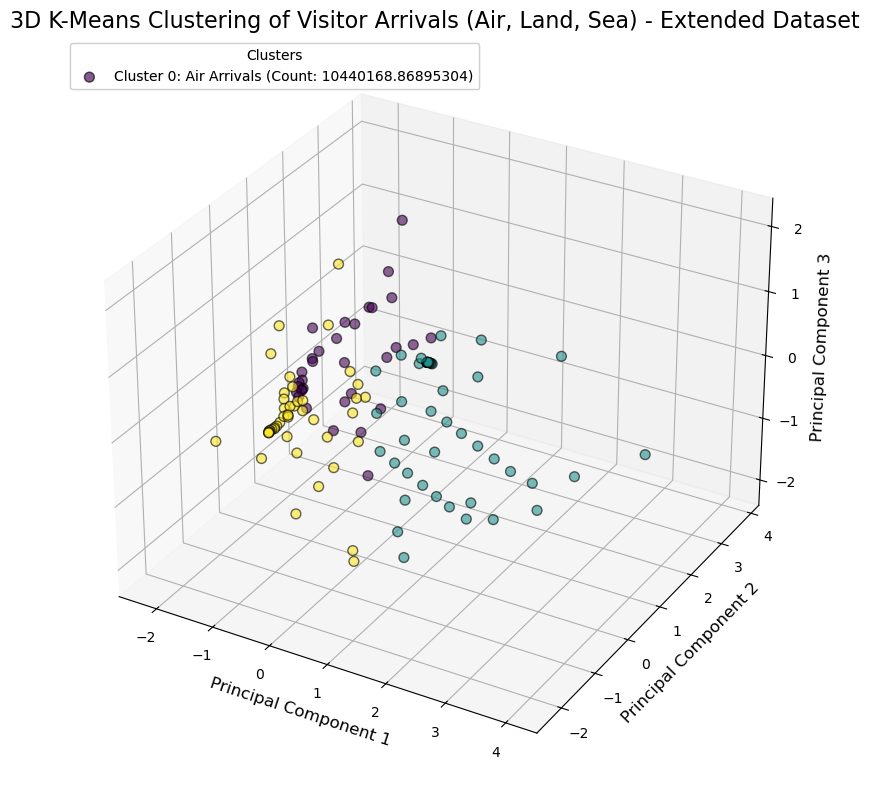

Cluster Counts and Dominant Modes (Extended Dataset):
         Air Arrivals  Land Arrivals  Sea Arrivals
Cluster                                           
0        1.044017e+07   4.393091e+06  1.125070e+06
1        3.903616e+07   4.206431e+05  4.538328e+06
2        6.002687e+06   7.850889e+05  8.837667e+05

Dominant Mode per Cluster (Extended Dataset):
Cluster
0    Air Arrivals
1    Air Arrivals
2    Air Arrivals
dtype: object


In [192]:

num_new_data_points = int(len(df) * 0.5)  # Increase by 50%

# Simulate new data based on the existing data
new_data_air = np.random.normal(loc=df['Air Arrivals'].mean(), scale=df['Air Arrivals'].std(), size=num_new_data_points)
new_data_land = np.random.normal(loc=df['Land Arrivals'].mean(), scale=df['Land Arrivals'].std(), size=num_new_data_points)
new_data_sea = np.random.normal(loc=df['Sea Arrivals'].mean(), scale=df['Sea Arrivals'].std(), size=num_new_data_points)

# Create a new DataFrame with the simulated data
new_data = pd.DataFrame({
    'Air Arrivals': new_data_air,
    'Land Arrivals': new_data_land,
    'Sea Arrivals': new_data_sea
})

# Add the new data to the original DataFrame
df_extended = pd.concat([df, new_data], ignore_index=True)

# Perform clustering on the extended dataset
X_extended = df_extended[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals']]
A_scaled_extended = scaler.fit_transform(X_extended)

# Apply K-Means clustering
kmeans_extended = KMeans(n_clusters=3, random_state=42)
df_extended['Cluster'] = kmeans_extended.fit_predict(A_scaled_extended)

# Apply PCA for visualization (2D and 3D)
pca_extended = PCA(n_components=3)
A_pca_extended = pca_extended.fit_transform(A_scaled_extended)

# Create a 3D scatter plot for the extended data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters as different colors
scatter = ax.scatter(A_pca_extended[:, 0], A_pca_extended[:, 1], A_pca_extended[:, 2], c=df_extended['Cluster'], cmap='viridis', s=50, alpha=0.6, edgecolor='k')

# Set axis labels
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Title
ax.set_title('3D K-Means Clustering of Visitor Arrivals (Air, Land, Sea) - Extended Dataset', fontsize=16)

# Add legend with cluster number and dominant mode
cluster_counts_extended = df_extended.groupby('Cluster')[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals']].sum()
dominant_modes_extended = cluster_counts_extended.idxmax(axis=1)
dominant_counts_extended = cluster_counts_extended.max(axis=1)

legend_labels_extended = []
for i in range(3):
    label = f'Cluster {i}: {dominant_modes_extended[i]} (Count: {dominant_counts_extended[i]})'
    legend_labels_extended.append(label)

legend1 = ax.legend(legend_labels_extended, title="Clusters", loc='upper left', fontsize=10)
ax.add_artist(legend1)

# Show the plot
plt.tight_layout()
plt.show()

# Print out the counts and dominant modes for the extended dataset
print("Cluster Counts and Dominant Modes (Extended Dataset):")
print(cluster_counts_extended)
print("\nDominant Mode per Cluster (Extended Dataset):")
print(dominant_modes_extended)


In [193]:
clustering_models = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'Affinity Propagation': AffinityPropagation(random_state=42),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

In [194]:


# Apply clustering models and store the labels in the DataFrame
for name, model in clustering_models.items():
    # Fit the model
    model.fit(A_scaled)  # Use scaled data (A_scaled is assumed to be the scaled dataset)

    # Affinity Propagation might have less labels due to noise points (-1), handle it
    if name == 'Affinity Propagation':
        labels = model.labels_
        if len(labels) != len(df):  # Handle any discrepancy in label length
            labels = np.pad(labels, (0, len(df) - len(labels)), mode='constant', constant_values=-1)
        df[f'{name}_Cluster'] = labels
    else:
        df[f'{name}_Cluster'] = model.labels_

# Now we can evaluate the models using the clustering results
evaluation_results = {}

for name, model in clustering_models.items():
    # Retrieve the cluster labels from the DataFrame
    cluster_column = f'{name}_Cluster'

    # Ensure we have the correct column
    if cluster_column not in df.columns:
        print(f"Cluster column '{cluster_column}' not found for {name}")
        continue

    # Calculate evaluation metrics
    silhouette = silhouette_score(A_scaled, df[cluster_column])
    db_index = davies_bouldin_score(A_scaled, df[cluster_column])
    ari = adjusted_rand_score(df[cluster_column], df[cluster_column])  # Self-comparison for ARI

    # Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(A_scaled, df[cluster_column])

    # Store the results
    evaluation_results[name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,

        'Calinski-Harabasz Index': calinski_harabasz
    }

# Print out the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Evaluation Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Evaluation Metrics for K-Means:
  Silhouette Score: 0.4494
  Davies-Bouldin Index: 0.7895
  Calinski-Harabasz Index: 81.9699
Evaluation Metrics for Hierarchical:
  Silhouette Score: 0.4249
  Davies-Bouldin Index: 0.8413
  Calinski-Harabasz Index: 75.9946
Evaluation Metrics for Affinity Propagation:
  Silhouette Score: 0.4769
  Davies-Bouldin Index: 0.6564
  Calinski-Harabasz Index: 103.4353
Evaluation Metrics for Agglomerative Clustering:
  Silhouette Score: 0.4249
  Davies-Bouldin Index: 0.8413
  Calinski-Harabasz Index: 75.9946
Evaluation Metrics for DBSCAN:
  Silhouette Score: 0.3603
  Davies-Bouldin Index: 1.1727
  Calinski-Harabasz Index: 31.6255


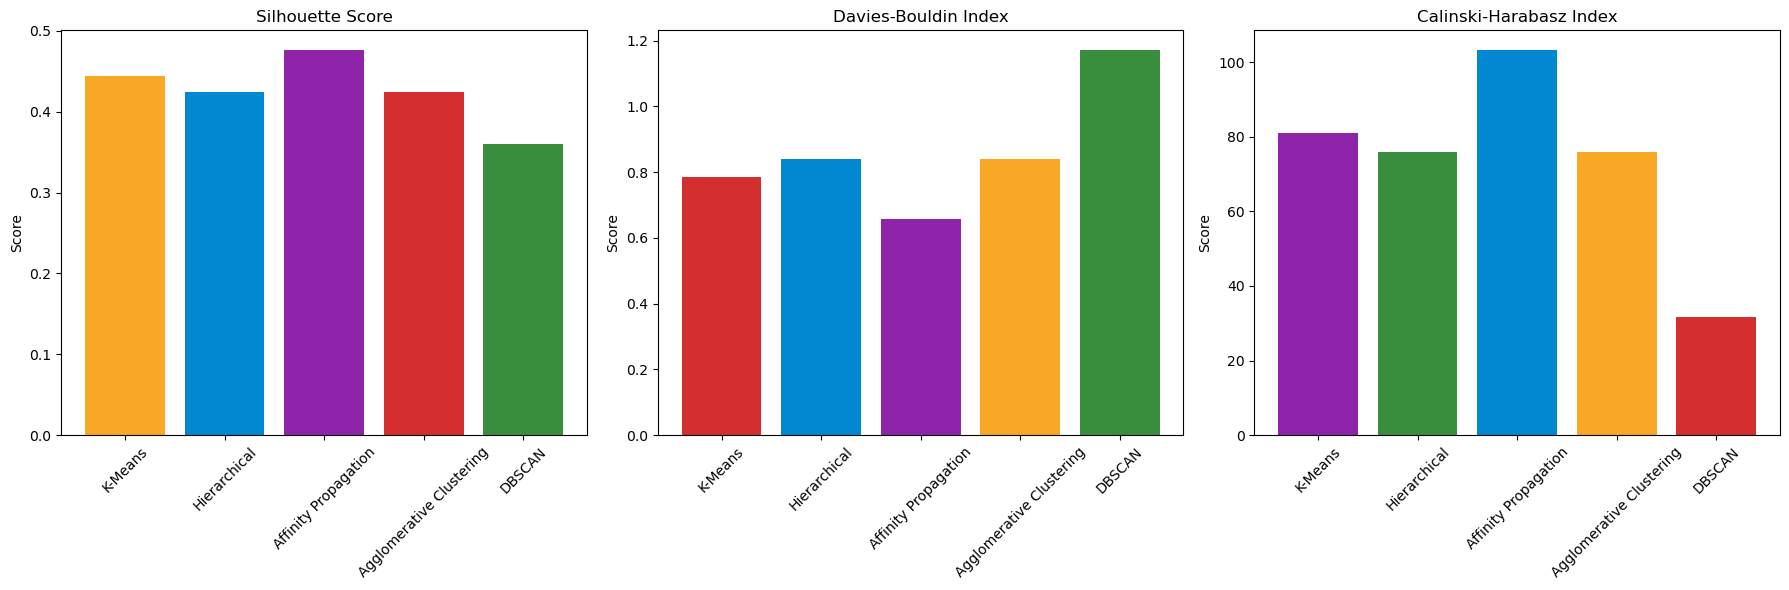

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Evaluation metrics for the clustering models
evaluation_metrics = {
    'K-Means': {
        'Silhouette Score': 0.4438,
        'Davies-Bouldin Index': 0.7858,
        'Calinski-Harabasz Index': 80.9402
    },
    'Hierarchical': {
        'Silhouette Score': 0.4249,
        'Davies-Bouldin Index': 0.8413,
        'Calinski-Harabasz Index': 75.9946
    },
    'Affinity Propagation': {
        'Silhouette Score': 0.4769,
        'Davies-Bouldin Index': 0.6564,
        'Calinski-Harabasz Index': 103.4353
    },
    'Agglomerative Clustering': {
        'Silhouette Score': 0.4249,
        'Davies-Bouldin Index': 0.8413,
        'Calinski-Harabasz Index': 75.9946
    },
    'DBSCAN': {
        'Silhouette Score': 0.3603,
        'Davies-Bouldin Index': 1.1727,
        'Calinski-Harabasz Index': 31.6255
    }
}

# Convert the evaluation metrics into a DataFrame for easier plotting
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting the evaluation metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Custom color palette
silhouette_colors = ['#F9A825', '#0288D1', '#8E24AA', '#D32F2F', '#388E3C']
davies_bouldin_colors = ['#D32F2F', '#0288D1', '#8E24AA', '#F9A825', '#388E3C']
calinski_harabasz_colors = ['#8E24AA', '#388E3C', '#0288D1', '#F9A825', '#D32F2F']

# Plot Silhouette Scores with colorful bars
axs[0].bar(metrics_df.index, metrics_df['Silhouette Score'], color=silhouette_colors)
axs[0].set_title('Silhouette Score')
axs[0].set_ylabel('Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot Davies-Bouldin Index with colorful bars
axs[1].bar(metrics_df.index, metrics_df['Davies-Bouldin Index'], color=davies_bouldin_colors)
axs[1].set_title('Davies-Bouldin Index')
axs[1].set_ylabel('Score')
axs[1].tick_params(axis='x', rotation=45)

# Plot Calinski-Harabasz Index with colorful bars
axs[2].bar(metrics_df.index, metrics_df['Calinski-Harabasz Index'], color=calinski_harabasz_colors)
axs[2].set_title('Calinski-Harabasz Index')
axs[2].set_ylabel('Score')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
